In [3]:
# install rpy2 if you do not have it
# !pip install rpy2

  Using cached rpy2-3.5.16.tar.gz (220 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cffi-1.17.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (1.5 kB)
Using cached cffi-1.17.1-cp39-cp39-macosx_11_0_arm64.whl (178 kB)
  Created wheel for rpy2: filename=rpy2-3.5.16-cp39-cp39-macosx_13_0_arm64.whl size=257852 sha256=35106b4cc90574a15b1a0745d1b422e35cb3a3c2d6671e851a3457c5bc7678e4
  Stored in directory: /Users/wahlau/Library/Caches/pip/wheels/61/18/0f/262eda2ac102e9688718abf0da99074f0a7f04cc783a03b991
Successfully built rpy2
  Attempting uninstall: cffi
    Found existing installation: cffi 1.15.0
    Uninstalling cffi-1.15.0:
      Successfully uninstalled cffi-1.15.0


In [4]:
# Import rpy2 interface and packages
import rpy2.robjects as robjects
from rpy2.robjects import r

In [6]:
# Execute R code to create a vector
r('x <- c(1, 2, 3, 4, 5)')
r('mean_x <- mean(x)')
# Retrieve the result
mean_x = r['mean_x']
mean_x

3.000000


In [7]:
# Calling a built-in R function
r_mean = robjects.r['mean']
result = r_mean(robjects.FloatVector([1, 2, 3, 4, 5]))
result

3.000000


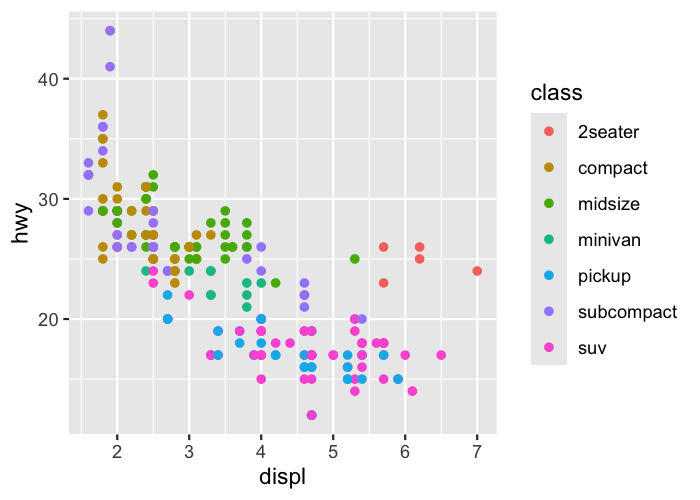

In [13]:
# let's use ggplot2 in Python
from rpy2.robjects.packages import importr
# import grdevices if you wish to display ggplot plot using jupyter 
from rpy2.robjects.lib import grdevices

# Import ggplot2 library
ggplot2 = importr('ggplot2')

# Create and render the plot in Jupyter
with grdevices.render_to_bytesio(grdevices.png, width=700, height=500, res=150) as image:
    # Create a simple ggplot2 plot using Python
    r('library(ggplot2)')
    r('''
        data(mpg, package='ggplot2')
        p <- ggplot(mpg, aes(x=displ, y=hwy, color=class)) + geom_point()
    ''')
    r('print(p)')

# Display the image in Jupyter
from IPython.display import Image
Image(image.getvalue())

In [14]:
import pandas as pd
from rpy2.robjects import pandas2ri

# Activate automatic data conversion between Pandas DataFrames and R data.frames
pandas2ri.activate()

# Create a Pandas DataFrame
df = pd.DataFrame({'a': [1, 2, 3], 'b': ['x', 'y', 'z']})

# Convert and send it to R
r_df = pandas2ri.py2rpy(df)
r.assign("r_df", r_df)

# Verify by running an R command
print(r('print(r_df)'))


  a b
0 1 x
1 2 y
2 3 z
None


In [15]:
# Get a data frame from R
r('data(iris)')
iris_df = pandas2ri.rpy2py(r['iris'])

# Check the first few rows in Python
print(iris_df.head())


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
1           5.1          3.5           1.4          0.2        1
2           4.9          3.0           1.4          0.2        1
3           4.7          3.2           1.3          0.2        1
4           4.6          3.1           1.5          0.2        1
5           5.0          3.6           1.4          0.2        1
